# Задание 1. Обучение без учителя Scikit-learn

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
data = boston["data"]
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
target = boston["target"]
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [6]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
x = pd.DataFrame(data, columns=feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y = pd.DataFrame(target, columns = ["Price"])
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.694865,0.000000,2.628491,0.0,5.222922,7.485465,3.479940,0.986899,2.797502,4.012849,9.074814,3.821411,3.507672
1,0.070779,0.000000,1.182095,0.0,4.576437,8.233447,2.020726,2.113421,0.466250,1.849767,9.434213,4.325931,1.192693
2,0.003910,1.513591,0.880036,0.0,3.724947,8.511471,0.833326,3.119769,0.116563,1.831691,7.592295,3.961045,1.102572
3,0.795393,0.000000,2.628491,0.0,5.222922,8.613084,3.043606,0.949832,2.797502,4.012849,9.074814,0.027555,3.279554
4,0.081881,0.000000,1.182095,0.0,4.576437,8.082440,2.485671,1.783577,0.466250,1.849767,9.434213,4.274867,1.588380


In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

x_train_tsne = tsne.fit_transform(x_train_scaled)

print('До:\t{}'.format(x_train_scaled.shape))
print('После:\t{}'.format(x_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


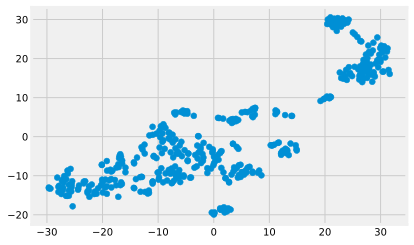

In [20]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

plt.show()

# Задание 2. Обучение без учителя Scikit-learn

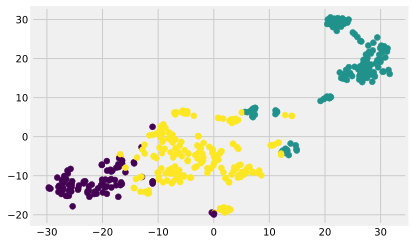

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(x_train_scaled)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)
plt.show()

In [41]:
print('Price_среднее: {}'.format(y_train.mean()))
print('Price_Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Price_Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Price_Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

Price_среднее: Price    22.796535
dtype: float64
Price_Кластер 0: Price    27.788372
dtype: float64
Price_Кластер 1: Price    16.165354
dtype: float64
Price_Кластер 2: Price    24.958115
dtype: float64


In [42]:
print('CRIM_среднее: {}'.format(x_train['CRIM'].mean()))
print('CRIM_Кластер 0: {}'.format(x_train['CRIM'][labels_train == 0].mean()))
print('CRIM_Кластер 1: {}'.format(x_train['CRIM'][labels_train == 1].mean()))
print('CRIM_Кластер 2: {}'.format(x_train['CRIM'][labels_train == 2].mean()))

CRIM_среднее: 3.609124628712873
CRIM_Кластер 0: 0.07356558139534886
CRIM_Кластер 1: 10.797028425196853
CRIM_Кластер 2: 0.42166020942408367


# Задание 3. Обучение без учителя Scikit-learn.

In [36]:
labels_test = kmeans.predict(x_test_scaled)

In [43]:
print('Price_среднее: {}'.format(y_test.mean()))
print('Price_Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Price_Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Price_Кластер 2: {}'.format(y_test[labels_test == 2].mean()))

Price_среднее: Price    21.488235
dtype: float64
Price_Кластер 0: Price    31.35
dtype: float64
Price_Кластер 1: Price    16.437143
dtype: float64
Price_Кластер 2: Price    21.860784
dtype: float64


In [44]:
print('CRIM_среднее: {}'.format(x_test['CRIM'].mean()))
print('CRIM_Кластер 0: {}'.format(x_test['CRIM'][labels_test == 0].mean()))
print('CRIM_Кластер 1: {}'.format(x_test['CRIM'][labels_test == 1].mean()))
print('CRIM_Кластер 2: {}'.format(x_test['CRIM'][labels_test == 2].mean()))

CRIM_среднее: 3.630946764705883
CRIM_Кластер 0: 0.062060000000000004
CRIM_Кластер 1: 10.165531142857143
CRIM_Кластер 2: 0.26607882352941176
